In [150]:
# Start_purchase_power_data_cleaning

In [151]:
import numpy as np 
import pandas as pd 

In [152]:
df = pd.read_csv('C:\GITHUB COLLECTIONS\ML-Purchasing-Capabilities-of-a-Customer\Datasets\Cleaned_data_acc_balance.csv')

In [153]:
df.head()

,Unnamed: 0,CustGender,CustAccountBalance,TransactionAmount (INR),FrequencyOfPurchasing,Age,MonthlyTransactionAverage,RecencyDays,CustomerLifetimeValue,LoyaltyScore,...,SavingsPotential,SavingsPotentialStatus,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,Lifestyle,DebtToIncomeRatio,CustAccountBalance_log,AccountBalanceRange
0,0,F,17819.05,25.0,1,30,25.000,59,25469.05,685.35,...,17519.05,Surplus,0.016667,0.2,0.000018,0.066672,High Spender,0.011779,9.788080,10K-50K
1,1,F,17874.44,459.0,1,28,459.000,59,158328.44,38.86,...,12366.44,Surplus,0.016667,0.2,0.000333,0.066766,High Spender,0.034788,9.791183,10K-50K
2,2,F,866503.21,2060.0,5,22,412.000,59,992575.21,420.43,...,861559.21,Surplus,0.016667,1.0,0.000299,0.306756,Low Spender,0.004981,13.672222,500K-1M
3,3,F,6714.43,1762.5,4,17,440.625,59,141545.68,3.81,...,1426.93,Surplus,0.016667,0.8,0.000319,0.246762,Low Spender,0.037355,8.812163,0-10K
4,4,F,53609.20,676.0,5,22,135.200,59,94980.40,79.19,...,51986.80,Surplus,0.016667,1.0,0.000098,0.306696,Low Spender,0.017081,10.889495,50K-100K


In [154]:
df = df.drop('Unnamed: 0' , axis = 1)

In [155]:
(df['CustAccountBalance'] >= 100000 ).sum()

np.int64(138810)

In [156]:
df_cleaned = df 

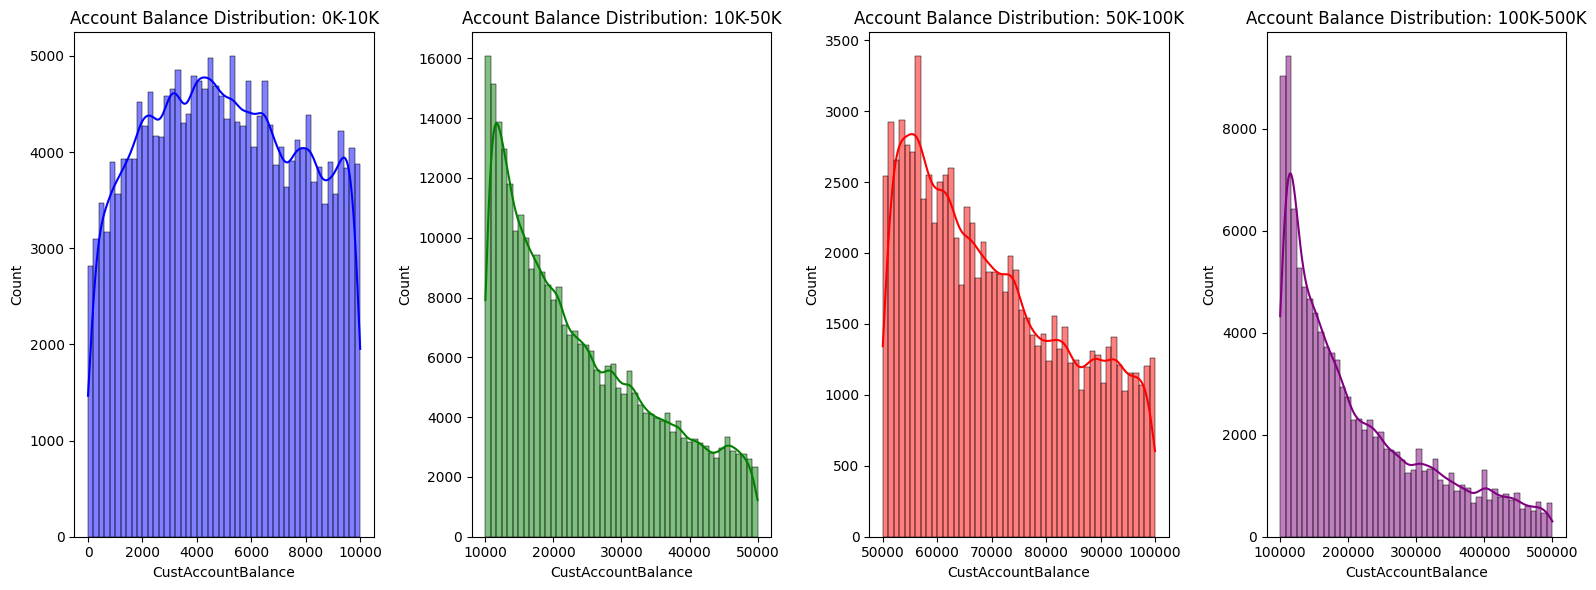

Number of customers in the 0K-10K range: 207304
Number of customers in the 10K-50K range: 307718
Number of customers in the 50K-100K range: 90332
Number of customers in the 100K-500K range: 109887

Summary statistics for 0K-10K range:
count    207304.000000
mean       5020.295452
std        2768.096371
min           0.000000
25%        2721.040000
50%        4955.160000
75%        7344.435000
max        9999.280000
Name: CustAccountBalance, dtype: float64

Summary statistics for 10K-50K range:
count    307718.000000
mean      23996.355883
std       10976.249175
min       10000.000000
25%       14534.060000
50%       21306.700000
75%       31740.100000
max       49999.090000
Name: CustAccountBalance, dtype: float64

Summary statistics for 50K-100K range:
count    90332.000000
mean     70467.212223
std      14158.732903
min      50000.230000
25%      58086.640000
50%      68122.250000
75%      81618.440000
max      99991.600000
Name: CustAccountBalance, dtype: float64

Summary statistics

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the dataset for the four ranges (including 0-10K)
range_0k_10k = df_cleaned[(df_cleaned['CustAccountBalance'] >= 0) & (df_cleaned['CustAccountBalance'] < 10000)]
range_10k_50k = df_cleaned[(df_cleaned['CustAccountBalance'] >= 10000) & (df_cleaned['CustAccountBalance'] < 50000)]
range_50k_100k = df_cleaned[(df_cleaned['CustAccountBalance'] >= 50000) & (df_cleaned['CustAccountBalance'] < 100000)]
range_100k_500k = df_cleaned[(df_cleaned['CustAccountBalance'] >= 100000) & (df_cleaned['CustAccountBalance'] < 500000)]

# Plot the distribution of CustAccountBalance within these ranges
plt.figure(figsize=(16, 6))

# Plot for 0K-10K range
plt.subplot(1, 4, 1)
sns.histplot(range_0k_10k['CustAccountBalance'], kde=True, bins=50, color='blue')
plt.title('Account Balance Distribution: 0K-10K')

# Plot for 10K-50K range
plt.subplot(1, 4, 2)
sns.histplot(range_10k_50k['CustAccountBalance'], kde=True, bins=50, color='green')
plt.title('Account Balance Distribution: 10K-50K')

# Plot for 50K-100K range
plt.subplot(1, 4, 3)
sns.histplot(range_50k_100k['CustAccountBalance'], kde=True, bins=50, color='red')
plt.title('Account Balance Distribution: 50K-100K')

# Plot for 100K-500K range
plt.subplot(1, 4, 4)
sns.histplot(range_100k_500k['CustAccountBalance'], kde=True, bins=50, color='purple')
plt.title('Account Balance Distribution: 100K-500K')

plt.tight_layout()
plt.show()

# Check the number of customers in each range
print("Number of customers in the 0K-10K range:", len(range_0k_10k))
print("Number of customers in the 10K-50K range:", len(range_10k_50k))
print("Number of customers in the 50K-100K range:", len(range_50k_100k))
print("Number of customers in the 100K-500K range:", len(range_100k_500k))

# Check summary statistics for these ranges
print("\nSummary statistics for 0K-10K range:")
print(range_0k_10k['CustAccountBalance'].describe())

print("\nSummary statistics for 10K-50K range:")
print(range_10k_50k['CustAccountBalance'].describe())

print("\nSummary statistics for 50K-100K range:")
print(range_50k_100k['CustAccountBalance'].describe())

print("\nSummary statistics for 100K-500K range:")
print(range_100k_500k['CustAccountBalance'].describe())


In [158]:
proportion = 0.01 
num_rows = int (len(df)* proportion)

random_indeces = np.random .choice(df.index, num_rows, replace=False)
df.loc[random_indeces , 'CustAccountBalance'] = 0

zero_balance_count = (df['CustAccountBalance'] == 0).sum()
print(f"Updated count of zero balances: {zero_balance_count}")

Updated count of zero balances: 7443


In [159]:
zero_balance_count = (df['CustAccountBalance'] == 0).sum()
print(f"Total zero-balance customers: {zero_balance_count}")

# Distribution of balances
balance_distribution = df['CustAccountBalance'].describe()
print(balance_distribution)


Total zero-balance customers: 7443
count    7.441640e+05
mean     1.068701e+05
std      4.980149e+05
min      0.000000e+00
25%      8.597647e+03
50%      2.213652e+04
75%      6.614478e+04
max      4.316556e+07
Name: CustAccountBalance, dtype: float64


In [160]:
zero_balance_summary = df[df['CustAccountBalance'] == 0].describe()
print(zero_balance_summary)


       CustAccountBalance  TransactionAmount (INR)  FrequencyOfPurchasing  \
count              7443.0              7443.000000            7443.000000   
mean                  0.0               934.050584               3.056832   
std                   0.0              2433.052808               1.408451   
min                   0.0                 0.000000               1.000000   
25%                   0.0               129.000000               2.000000   
50%                   0.0               360.000000               3.000000   
75%                   0.0               920.000000               4.000000   
max                   0.0             85389.000000               5.000000   

               Age  MonthlyTransactionAverage  RecencyDays  \
count  7443.000000                7443.000000  7443.000000   
mean     24.733306                 383.265801    35.958619   
std       5.940623                1018.130906    14.678555   
min      15.000000                   0.000000     0.000000

Summary statistics for CustomerLifetimeValue (zero-balance customers):
count    7.443000e+03
mean     2.292560e+05
std      6.004760e+05
min      0.000000e+00
25%      3.461337e+04
50%      8.574921e+04
75%      2.145166e+05
max      2.191818e+07
Name: CustomerLifetimeValue, dtype: float64


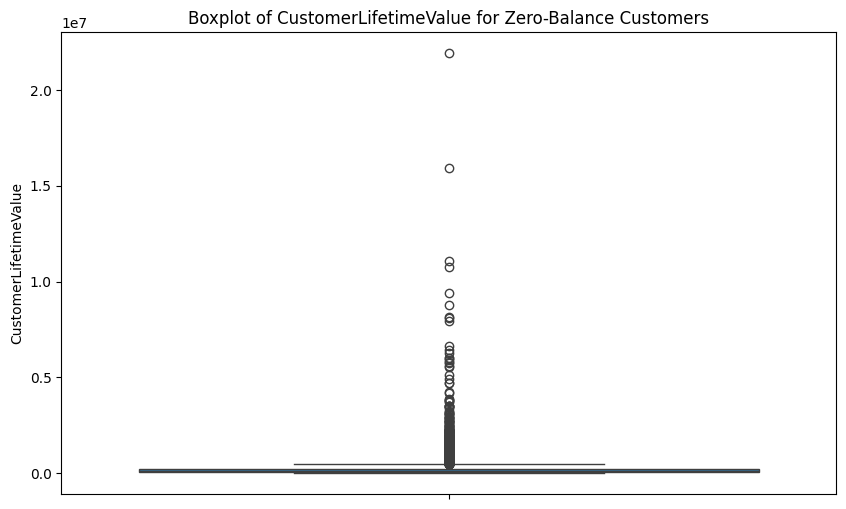


Unique values in CustAccountBalance_log (zero-balance customers):
[ 8.81216314 11.63726244 12.55128033 ...  7.04826477 10.80590651
  9.3186278 ]

Updated CustAccountBalance_log for zero-balance customers:
[0.]

Updated CustAccountBalance_log for zero-balance customers:
[0.]


In [161]:
import numpy as np

# Filter zero-balance customers
zero_balance_customers = df_cleaned[df_cleaned['CustAccountBalance'] == 0]

# Analyze CustomerLifetimeValue for zero-balance customers
print("Summary statistics for CustomerLifetimeValue (zero-balance customers):")
print(zero_balance_customers['CustomerLifetimeValue'].describe())

# Visualize CustomerLifetimeValue to identify potential outliers
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(zero_balance_customers['CustomerLifetimeValue'])
plt.title("Boxplot of CustomerLifetimeValue for Zero-Balance Customers")
plt.show()

# Check CustAccountBalance_log for zero-balance customers
print("\nUnique values in CustAccountBalance_log (zero-balance customers):")
print(zero_balance_customers['CustAccountBalance_log'].unique())

# Fix potential issues with CustAccountBalance_log (if log(0) is present)
df_cleaned['CustAccountBalance_log'] = np.where(
    df_cleaned['CustAccountBalance'] == 0, 0, df_cleaned['CustAccountBalance_log']
)

print("\nUpdated CustAccountBalance_log for zero-balance customers:")
print(df_cleaned[df_cleaned['CustAccountBalance'] == 0]['CustAccountBalance_log'].unique())


print("\nUpdated CustAccountBalance_log for zero-balance customers:")
print(df_cleaned[df_cleaned['CustAccountBalance'] == 0]['CustAccountBalance_log'].unique())


In [162]:
# Calculate the mean or median CustomerLifetimeValue of non-zero balance customers
non_zero_balance_customers = df_cleaned[df_cleaned['CustAccountBalance'] > 0]
scaling_factor = non_zero_balance_customers['CustomerLifetimeValue'].median()  # or use mean()

# Apply the scaling factor to zero-balance customers
df_cleaned.loc[df_cleaned['CustAccountBalance'] == 0, 'CustomerLifetimeValue'] *= scaling_factor / df_cleaned['CustomerLifetimeValue'].median()

# Check the updated CustomerLifetimeValue for zero-balance customers
print("\nUpdated CustomerLifetimeValue for zero-balance customers:")
print(df_cleaned[df_cleaned['CustAccountBalance'] == 0]['CustomerLifetimeValue'].describe())



Updated CustomerLifetimeValue for zero-balance customers:
count    7.443000e+03
mean     2.292559e+05
std      6.004757e+05
min      0.000000e+00
25%      3.461335e+04
50%      8.574917e+04
75%      2.145165e+05
max      2.191817e+07
Name: CustomerLifetimeValue, dtype: float64


In [163]:
# Display column names to check for any mismatches
print(df_cleaned.columns)


Index(['CustGender', 'CustAccountBalance', 'TransactionAmount (INR)',
       'FrequencyOfPurchasing', 'Age', 'MonthlyTransactionAverage',
       'RecencyDays', 'CustomerLifetimeValue', 'LoyaltyScore',
       'EstimatedYearlySpending', 'SavingsPotential', 'SavingsPotentialStatus',
       'RecencyScore', 'FrequencyScore', 'MonetaryScore', 'RFM_Score',
       'Lifestyle', 'DebtToIncomeRatio', 'CustAccountBalance_log',
       'AccountBalanceRange'],
      dtype='object')


In [164]:
# List of columns to display for zero-balance customers
columns_of_interest = ['TransactionAmount (INR)', 'Age', 'MonthlyTransactionAverage', 
                       'RecencyDays', 'CustomerLifetimeValue', 'LoyaltyScore', 
                       'EstimatedYearlySpending', 'SavingsPotential', 
                       'RecencyScore', 'FrequencyScore', 'MonetaryScore', 
                       'RFM_Score', 'DebtToIncomeRatio', 'CustAccountBalance_log']

# Display summary statistics for these columns for zero-balance customers
zero_balance_summary = zero_balance_customers[columns_of_interest].describe()
print(zero_balance_summary)


       TransactionAmount (INR)          Age  MonthlyTransactionAverage  \
count              7443.000000  7443.000000                7443.000000   
mean                934.050584    24.733306                 383.265801   
std                2433.052808     5.940623                1018.130906   
min                   0.000000    15.000000                   0.000000   
25%                 129.000000    20.000000                  49.000000   
50%                 360.000000    23.000000                 131.000000   
75%                 920.000000    31.000000                 360.000000   
max               85389.000000    34.000000               30000.000000   

       RecencyDays  CustomerLifetimeValue   LoyaltyScore  \
count  7443.000000           7.443000e+03    7443.000000   
mean     35.958619           2.292560e+05     528.707330   
std      14.678555           6.004760e+05    4316.933998   
min       0.000000           0.000000e+00       0.000000   
25%      24.000000           3.46

In [165]:
# Define the columns to process (the ones with potential outliers)
columns = ['TransactionAmount (INR)', 'CustomerLifetimeValue', 'SavingsPotential']

# Function to handle outliers and apply transformations
def handle_outliers_and_transform(data, columns):
    for col in columns:
        # Calculate IQR
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Identify outliers using IQR method
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Capping outliers using .loc to avoid warnings
        data.loc[data[col] < lower_bound, col] = lower_bound
        data.loc[data[col] > upper_bound, col] = upper_bound
        
        # Apply log transformation for skewed data using .loc
        data.loc[:, col] = np.log1p(data[col])  # log(x+1) to avoid log(0)
    
    return data

# Apply outlier handling and transformation to zero_balance_customers
zero_balance_customers = handle_outliers_and_transform(zero_balance_customers, columns)

# Display updated statistics for the processed columns
print(zero_balance_customers[columns].describe())


       TransactionAmount (INR)  CustomerLifetimeValue  SavingsPotential
count              7443.000000            7443.000000       7443.000000
mean                  5.737149              11.289756          9.739044
std                   1.400436               1.276394          1.608698
min                   0.000000               0.000000          0.000000
25%                   4.867534              10.452024          8.797400
50%                   5.888878              11.359194          9.849883
75%                   6.825460              12.276147         10.987830
max                   7.653258              13.090609         11.834641


In [166]:
df_cleaned.describe()

,CustAccountBalance,TransactionAmount (INR),FrequencyOfPurchasing,Age,MonthlyTransactionAverage,RecencyDays,CustomerLifetimeValue,LoyaltyScore,EstimatedYearlySpending,SavingsPotential,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,DebtToIncomeRatio,CustAccountBalance_log
count,7.441640e+05,744164.000000,744164.000000,744164.000000,744164.000000,744164.000000,7.441640e+05,7.441640e+05,7.441640e+05,7.441640e+05,744164.000000,744164.000000,744164.000000,744164.000000,744164.000000,744164.000000
mean,1.068701e+05,942.686805,3.091980,24.745720,386.150759,35.859340,2.349554e+05,8.361986e+02,4.633809e+03,1.032701e+05,0.038138,0.618396,0.000280,0.200858,0.021716,10.015327
std,4.980149e+05,2558.924840,1.397847,5.950103,1164.178548,14.810865,6.766003e+05,4.014800e+04,1.397014e+04,4.979202e+05,0.052861,0.279569,0.000844,0.086410,0.010578,1.899653
min,0.000000e+00,0.000000,1.000000,15.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.016393,0.200000,0.000000,0.066557,0.000000,0.000000
25%,8.597647e+03,130.000000,2.000000,20.000000,48.652500,24.000000,3.469268e+04,2.226000e+01,5.838300e+02,6.525419e+03,0.020000,0.400000,0.000035,0.129549,0.013158,9.059360
50%,2.213652e+04,350.000000,3.000000,23.000000,128.689750,36.000000,8.574568e+04,6.356000e+01,1.544277e+03,1.898941e+04,0.027027,0.600000,0.000093,0.193819,0.023987,10.005029
75%,6.614478e+04,949.500000,4.000000,31.000000,350.000000,49.000000,2.123486e+05,2.057800e+02,4.200000e+03,6.111558e+04,0.040000,0.800000,0.000254,0.260009,0.031033,11.099616
max,4.316556e+07,100000.000000,5.000000,34.000000,100000.000000,60.000000,4.339348e+07,2.438334e+07,1.200000e+06,4.316487e+07,1.000000,1.000000,0.072464,0.704348,0.037854,17.580553


In [167]:
# Columns to check for outliers
columns_to_check = ['CustAccountBalance', 'TransactionAmount (INR)', 'CustomerLifetimeValue']

In [168]:
# Z-Score Method
def remove_outliers_zscore(df, columns, threshold=3):
    from scipy.stats import zscore
    df_cleaned = df.copy()
    for col in columns:
        df_cleaned[f'{col}_zscore'] = zscore(df_cleaned[col])
        df_cleaned = df_cleaned[(df_cleaned[f'{col}_zscore'] < threshold) & (df_cleaned[f'{col}_zscore'] > -threshold)]
        df_cleaned.drop(columns=[f'{col}_zscore'], inplace=True)
    return df_cleaned

# IQR Method
def remove_outliers_iqr(df, columns):
    df_cleaned = df.copy()
    for col in columns:
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
    return df_cleaned

# Apply both methods (choose one to use)
# Uncomment one of the following lines based on your choice:

# Method 1: Using Z-Score
cleaned_data = remove_outliers_zscore(df_cleaned, columns_to_check)

# Method 2: Using IQR
#cleaned_data = remove_outliers_iqr(df_cleaned, columns_to_check)



In [169]:
print(cleaned_data.describe())

       CustAccountBalance  TransactionAmount (INR)  FrequencyOfPurchasing  \
count       712604.000000            712604.000000          712604.000000   
mean         59669.659794               677.556603               3.111667   
std         108735.963656               947.451964               1.391451   
min              0.000000                 0.000000               1.000000   
25%           8194.950000               120.000000               2.000000   
50%          20494.870000               325.000000               3.000000   
75%          56791.020000               830.000000               4.000000   
max         976133.120000              8044.000000               5.000000   

                 Age  MonthlyTransactionAverage    RecencyDays  \
count  712604.000000              712604.000000  712604.000000   
mean       24.830356                 263.498099      35.877983   
std         6.000350                 371.303462      14.813529   
min        15.000000                   0.0

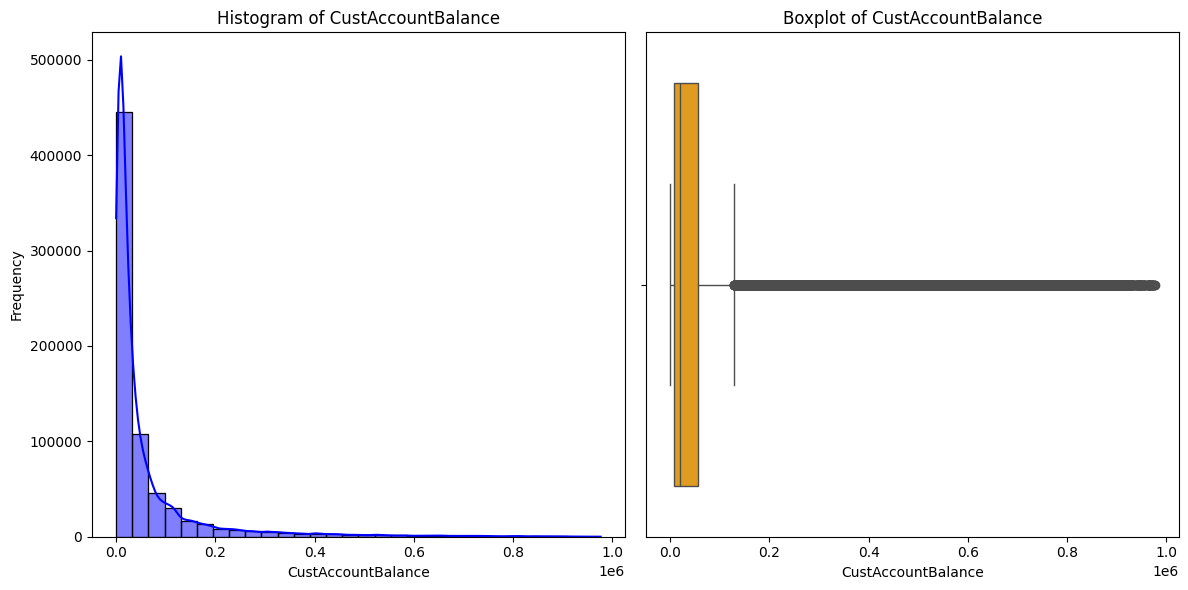

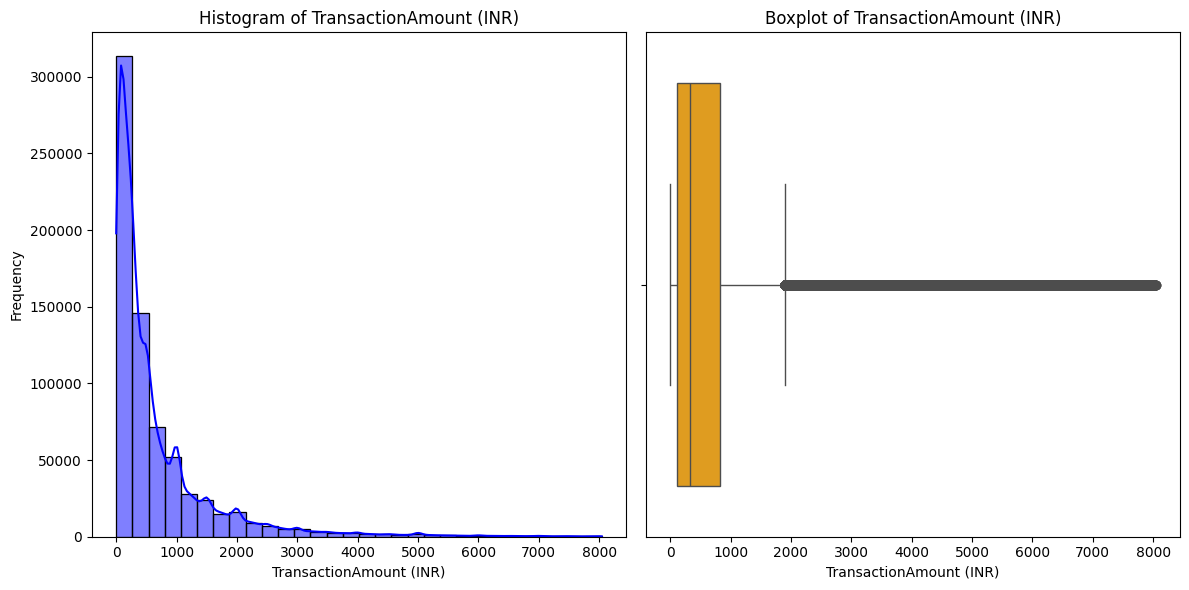

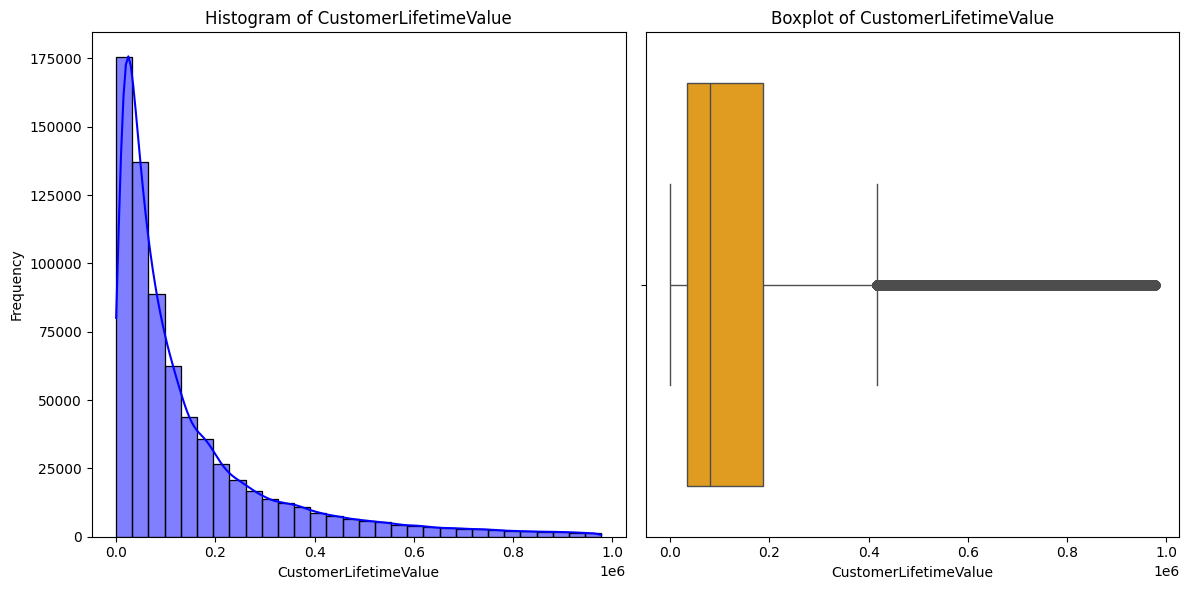

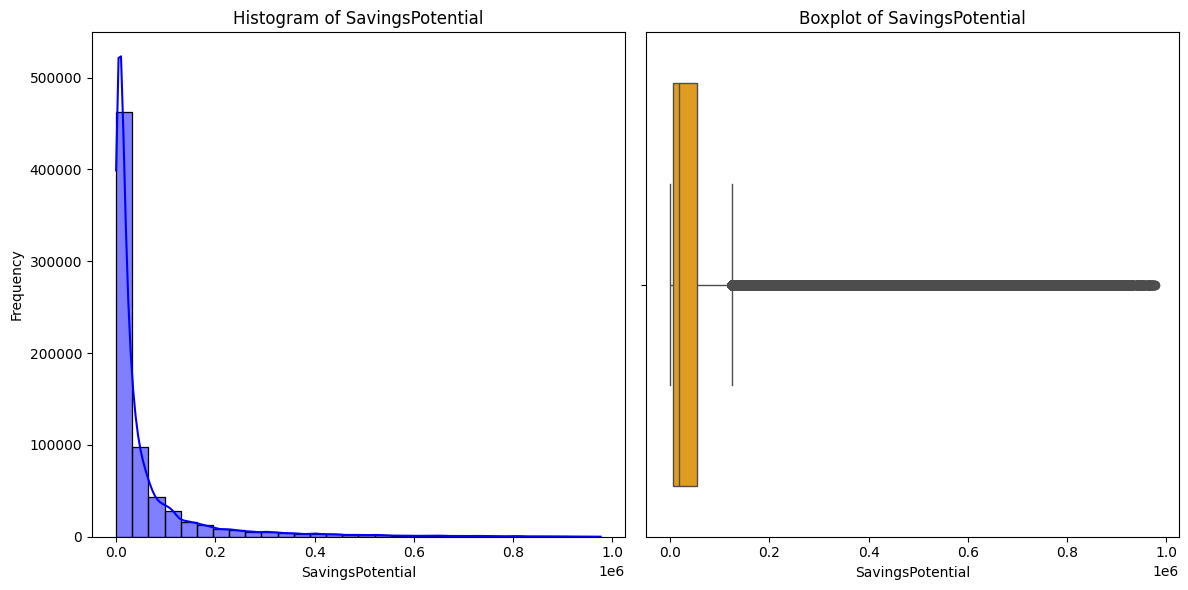

In [170]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define columns to visualize
columns_to_plot = ['CustAccountBalance', 'TransactionAmount (INR)', 'CustomerLifetimeValue', 'SavingsPotential']

# Create histograms and boxplots
for column in columns_to_plot:
    plt.figure(figsize=(12, 6))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(cleaned_data[column], kde=True, bins=30, color='blue')
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=cleaned_data[column], color='orange')
    plt.title(f"Boxplot of {column}")
    plt.xlabel(column)
    
    plt.tight_layout()
    plt.show()


In [171]:
# Select only numeric columns for correlation calculation
numeric_columns = cleaned_data.select_dtypes(include='number')
correlation_matrix = numeric_columns.corr()
print(correlation_matrix)


                           CustAccountBalance  TransactionAmount (INR)  \
CustAccountBalance                   1.000000                 0.162863   
TransactionAmount (INR)              0.162863                 1.000000   
FrequencyOfPurchasing               -0.001567                 0.103887   
Age                                 -0.099519                -0.096356   
MonthlyTransactionAverage            0.151277                 0.798686   
RecencyDays                          0.001451                 0.015175   
CustomerLifetimeValue                0.721955                 0.656122   
LoyaltyScore                         0.153398                -0.051080   
EstimatedYearlySpending              0.151277                 0.798686   
SavingsPotential                     0.992356                 0.131943   
RecencyScore                        -0.001822                -0.007957   
FrequencyScore                      -0.001567                 0.103887   
MonetaryScore                        0

In [172]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Ensure 'cleaned_data' is the correct DataFrame you're working with
# Initialize the StandardScaler
scaler = StandardScaler()

# Select the columns to scale
columns_to_scale = ['DebtToIncomeRatio', 'SavingsPotential']

# Check if any missing values exist in these columns
print(cleaned_data[columns_to_scale].isnull().sum())

# If there are missing values, handle them by filling or removing the rows
cleaned_data = cleaned_data.dropna(subset=columns_to_scale)

# Apply scaling (fit and transform)
cleaned_data[columns_to_scale] = scaler.fit_transform(cleaned_data[columns_to_scale])

# Check the scaled values
print(cleaned_data[columns_to_scale].head())


DebtToIncomeRatio    0
SavingsPotential     0
dtype: int64
   DebtToIncomeRatio  SavingsPotential
0          -0.967652         -0.364695
1           1.243295         -0.412158
3           1.489953         -0.512926
4          -0.458149         -0.047198
5          -1.698499          0.345621


In [173]:
# Select only numeric columns
numeric_data = cleaned_data.select_dtypes(include=['float64', 'int64'])

# Check for missing values
print(numeric_data.isnull().sum())

# Compute the correlation matrix for the numeric columns
correlation_matrix = numeric_data.corr()

# Display the correlations of DebtToIncomeRatio and SavingsPotential with other features
print(correlation_matrix[['DebtToIncomeRatio', 'SavingsPotential']])


CustAccountBalance           0
TransactionAmount (INR)      0
FrequencyOfPurchasing        0
Age                          0
MonthlyTransactionAverage    0
RecencyDays                  0
CustomerLifetimeValue        0
LoyaltyScore                 0
EstimatedYearlySpending      0
SavingsPotential             0
RecencyScore                 0
FrequencyScore               0
MonetaryScore                0
RFM_Score                    0
DebtToIncomeRatio            0
CustAccountBalance_log       0
dtype: int64
                           DebtToIncomeRatio  SavingsPotential
CustAccountBalance                 -0.469409          0.992356
TransactionAmount (INR)             0.328483          0.131943
FrequencyOfPurchasing              -0.217807          0.009573
Age                                 0.011588         -0.096850
MonthlyTransactionAverage           0.387914          0.112035
RecencyDays                         0.079231          0.000897
CustomerLifetimeValue              -0.026178      

In [174]:
# Check for negative or extreme values in RecencyDays and FrequencyScore
print(cleaned_data[['RecencyDays', 'FrequencyScore', 'CustomerLifetimeValue']].describe())

# Handle negative values in RecencyDays (if any)
cleaned_data['RecencyDays'] = cleaned_data['RecencyDays'].apply(lambda x: max(x, 0))  # Replace negative values with 0

# Handle outliers in FrequencyScore (if any, e.g., values beyond 3 standard deviations)
frequency_score_mean = cleaned_data['FrequencyScore'].mean()
frequency_score_std = cleaned_data['FrequencyScore'].std()
upper_limit = frequency_score_mean + 3 * frequency_score_std
lower_limit = frequency_score_mean - 3 * frequency_score_std
cleaned_data['FrequencyScore'] = cleaned_data['FrequencyScore'].apply(lambda x: min(max(x, lower_limit), upper_limit))  # Clip outliers

# Handle outliers in CustomerLifetimeValue (if any, e.g., values beyond 3 standard deviations)
customer_lifetime_value_mean = cleaned_data['CustomerLifetimeValue'].mean()
customer_lifetime_value_std = cleaned_data['CustomerLifetimeValue'].std()
upper_limit_clv = customer_lifetime_value_mean + 3 * customer_lifetime_value_std
lower_limit_clv = customer_lifetime_value_mean - 3 * customer_lifetime_value_std
cleaned_data['CustomerLifetimeValue'] = cleaned_data['CustomerLifetimeValue'].apply(lambda x: min(max(x, lower_limit_clv), upper_limit_clv))  # Clip outliers

# Standardize the columns for scaling
columns_to_scale = ['RecencyDays', 'FrequencyScore', 'CustomerLifetimeValue']

# Apply scaling (fit and transform)
scaler = StandardScaler()
cleaned_data[columns_to_scale] = scaler.fit_transform(cleaned_data[columns_to_scale])

# Check the scaled values
print(cleaned_data[columns_to_scale].head())


         RecencyDays  FrequencyScore  CustomerLifetimeValue
count  712604.000000   712604.000000          712604.000000
mean       35.877983        0.622333          146907.621414
std        14.813529        0.278290          175702.507738
min         0.000000        0.200000               0.000000
25%        24.000000        0.400000           33131.525000
50%        36.000000        0.600000           79763.515000
75%        49.000000        0.800000          186735.550000
max        60.000000        1.000000          977781.110000
   RecencyDays  FrequencyScore  CustomerLifetimeValue
0     1.560873       -1.517601              -0.725034
1     1.560873       -1.517601               0.092201
3     1.560873        0.638423              -0.011032
4     1.560873        1.357098              -0.297461
5     1.560873        0.638423              -0.227233


In [175]:
cleaned_data.head()

,CustGender,CustAccountBalance,TransactionAmount (INR),FrequencyOfPurchasing,Age,MonthlyTransactionAverage,RecencyDays,CustomerLifetimeValue,LoyaltyScore,EstimatedYearlySpending,SavingsPotential,SavingsPotentialStatus,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,Lifestyle,DebtToIncomeRatio,CustAccountBalance_log,AccountBalanceRange
0,F,17819.05,25.0,1,30,25.000,1.560873,-0.725034,685.35,300.0,-0.364695,Surplus,0.016667,-1.517601,0.000018,0.066672,High Spender,-0.967652,9.788080,10K-50K
1,F,17874.44,459.0,1,28,459.000,1.560873,0.092201,38.86,5508.0,-0.412158,Surplus,0.016667,-1.517601,0.000333,0.066766,High Spender,1.243295,9.791183,10K-50K
3,F,0.00,1762.5,4,17,440.625,1.560873,-0.011032,3.81,5287.5,-0.512926,Surplus,0.016667,0.638423,0.000319,0.246762,Low Spender,1.489953,0.000000,0-10K
4,F,53609.20,676.0,5,22,135.200,1.560873,-0.297461,79.19,1622.4,-0.047198,Surplus,0.016667,1.357098,0.000098,0.306696,Low Spender,-0.458149,10.889495,50K-100K
5,M,95075.54,148.0,4,26,37.000,1.560873,-0.227233,638.09,444.0,0.345621,Surplus,0.016667,0.638423,0.000027,0.246675,Low Spender,-1.698499,11.462438,50K-100K


In [176]:
import pandas as pd


def flag_credit_or_overdraft(row):
    # Create a threshold for flagging customers based on account balance and transaction amount
    if row['CustAccountBalance'] < 5000 and row['TransactionAmount (INR)'] > 1000:
        return 1  # Likely to need credit or overdraft
    elif row['DebtToIncomeRatio'] > 0.5:  # High debt-to-income ratio
        return 1  # Likely to need credit or overdraft
    elif row['RecencyDays'] < 30 and row['FrequencyOfPurchasing'] > 2:  # Recent and frequent transactions
        return 1  # Likely to need credit or overdraft
    else:
        return 0  # Not likely to need credit or overdraft

# Apply the function to create the new column
cleaned_data['Include Credit or Overdraft History'] = cleaned_data.apply(flag_credit_or_overdraft, axis=1)

# Check the first few rows of the dataset
print(cleaned_data[['CustAccountBalance', 'TransactionAmount (INR)', 'DebtToIncomeRatio', 'RecencyDays', 'FrequencyOfPurchasing', 'Include Credit or Overdraft History']].head())


   CustAccountBalance  TransactionAmount (INR)  DebtToIncomeRatio  \
0            17819.05                     25.0          -0.967652   
1            17874.44                    459.0           1.243295   
3                0.00                   1762.5           1.489953   
4            53609.20                    676.0          -0.458149   
5            95075.54                    148.0          -1.698499   

   RecencyDays  FrequencyOfPurchasing  Include Credit or Overdraft History  
0     1.560873                      1                                    0  
1     1.560873                      1                                    1  
3     1.560873                      4                                    1  
4     1.560873                      5                                    1  
5     1.560873                      4                                    1  


In [177]:
cleaned_data.head()

,CustGender,CustAccountBalance,TransactionAmount (INR),FrequencyOfPurchasing,Age,MonthlyTransactionAverage,RecencyDays,CustomerLifetimeValue,LoyaltyScore,EstimatedYearlySpending,...,SavingsPotentialStatus,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,Lifestyle,DebtToIncomeRatio,CustAccountBalance_log,AccountBalanceRange,Include Credit or Overdraft History
0,F,17819.05,25.0,1,30,25.000,1.560873,-0.725034,685.35,300.0,...,Surplus,0.016667,-1.517601,0.000018,0.066672,High Spender,-0.967652,9.788080,10K-50K,0
1,F,17874.44,459.0,1,28,459.000,1.560873,0.092201,38.86,5508.0,...,Surplus,0.016667,-1.517601,0.000333,0.066766,High Spender,1.243295,9.791183,10K-50K,1
3,F,0.00,1762.5,4,17,440.625,1.560873,-0.011032,3.81,5287.5,...,Surplus,0.016667,0.638423,0.000319,0.246762,Low Spender,1.489953,0.000000,0-10K,1
4,F,53609.20,676.0,5,22,135.200,1.560873,-0.297461,79.19,1622.4,...,Surplus,0.016667,1.357098,0.000098,0.306696,Low Spender,-0.458149,10.889495,50K-100K,1
5,M,95075.54,148.0,4,26,37.000,1.560873,-0.227233,638.09,444.0,...,Surplus,0.016667,0.638423,0.000027,0.246675,Low Spender,-1.698499,11.462438,50K-100K,1


In [178]:
cleaned_data.columns

Index(['CustGender', 'CustAccountBalance', 'TransactionAmount (INR)',
       'FrequencyOfPurchasing', 'Age', 'MonthlyTransactionAverage',
       'RecencyDays', 'CustomerLifetimeValue', 'LoyaltyScore',
       'EstimatedYearlySpending', 'SavingsPotential', 'SavingsPotentialStatus',
       'RecencyScore', 'FrequencyScore', 'MonetaryScore', 'RFM_Score',
       'Lifestyle', 'DebtToIncomeRatio', 'CustAccountBalance_log',
       'AccountBalanceRange', 'Include Credit or Overdraft History'],
      dtype='object')

## Train Test Split

In [179]:
# Drop the non-important columns
columns_to_drop = ['SavingsPotentialStatus', 'Lifestyle', 'AccountBalanceRange']

# Drop the columns from the dataframe
cleaned_data = cleaned_data.drop(columns=columns_to_drop)

# Display the updated dataframe columns
print(cleaned_data.columns)


Index(['CustGender', 'CustAccountBalance', 'TransactionAmount (INR)',
       'FrequencyOfPurchasing', 'Age', 'MonthlyTransactionAverage',
       'RecencyDays', 'CustomerLifetimeValue', 'LoyaltyScore',
       'EstimatedYearlySpending', 'SavingsPotential', 'RecencyScore',
       'FrequencyScore', 'MonetaryScore', 'RFM_Score', 'DebtToIncomeRatio',
       'CustAccountBalance_log', 'Include Credit or Overdraft History'],
      dtype='object')


# Lable Encoding for Categorical data

In [180]:
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to the 'CustGender' column and store the result in the same column
cleaned_data['CustGender'] = le.fit_transform(cleaned_data['CustGender'])

# Verify the changes
print(cleaned_data.head())


   CustGender  CustAccountBalance  TransactionAmount (INR)  \
0           0            17819.05                     25.0   
1           0            17874.44                    459.0   
3           0                0.00                   1762.5   
4           0            53609.20                    676.0   
5           1            95075.54                    148.0   

   FrequencyOfPurchasing  Age  MonthlyTransactionAverage  RecencyDays  \
0                      1   30                     25.000     1.560873   
1                      1   28                    459.000     1.560873   
3                      4   17                    440.625     1.560873   
4                      5   22                    135.200     1.560873   
5                      4   26                     37.000     1.560873   

   CustomerLifetimeValue  LoyaltyScore  EstimatedYearlySpending  \
0              -0.725034        685.35                    300.0   
1               0.092201         38.86                

In [181]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712604 entries, 0 to 744163
Data columns (total 18 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   CustGender                           712604 non-null  int64  
 1   CustAccountBalance                   712604 non-null  float64
 2   TransactionAmount (INR)              712604 non-null  float64
 3   FrequencyOfPurchasing                712604 non-null  int64  
 4   Age                                  712604 non-null  int64  
 5   MonthlyTransactionAverage            712604 non-null  float64
 6   RecencyDays                          712604 non-null  float64
 7   CustomerLifetimeValue                712604 non-null  float64
 8   LoyaltyScore                         712604 non-null  float64
 9   EstimatedYearlySpending              712604 non-null  float64
 10  SavingsPotential                     712604 non-null  float64
 11  RecencyScore      

Feature Scaling 

In [182]:
from sklearn.preprocessing import StandardScaler

# Define the features (excluding the target variable 'CustGender' and 'Include Credit or Overdraft History' as they are binary/categorical)
X = cleaned_data.drop(columns=['CustGender', 'Include Credit or Overdraft History'])

# Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [183]:
from sklearn.cluster import KMeans

# Instantiate the KMeans model with a specific number of clusters (e.g., 2 for potential vs. non-potential)
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit the model
cleaned_data['Cluster'] = kmeans.fit_predict(X_scaled)

# Check the first few rows to verify the clustering results
print(cleaned_data.head())


   CustGender  CustAccountBalance  TransactionAmount (INR)  \
0           0            17819.05                     25.0   
1           0            17874.44                    459.0   
3           0                0.00                   1762.5   
4           0            53609.20                    676.0   
5           1            95075.54                    148.0   

   FrequencyOfPurchasing  Age  MonthlyTransactionAverage  RecencyDays  \
0                      1   30                     25.000     1.560873   
1                      1   28                    459.000     1.560873   
3                      4   17                    440.625     1.560873   
4                      5   22                    135.200     1.560873   
5                      4   26                     37.000     1.560873   

   CustomerLifetimeValue  LoyaltyScore  EstimatedYearlySpending  \
0              -0.725034        685.35                    300.0   
1               0.092201         38.86                